In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from library import utils, config, cascades

In [2]:
with open('./results/7-9/traderIDs_501_1000_100_new2threshold_fixedhurst.pkl', 'rb') as f:
    traderIDsPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolPC = np.load("./results/7-9/stockPool_501_1000_100_new2threshold_fixedhurst.npy")
hurstPoolPC = np.load("./results/7-9/hurstPool_501_1000_100_new2threshold_fixedhurst.npy")
TtransactionsPC = pd.read_csv("./results/7-9/transactions_501_1000_100_new2threshold_fixedhurst.csv")
TtotalOrdersPC = pd.read_csv("./results/7-9/totalOrders_501_1000_100_new2threshold_fixedhurst.csv")

In [8]:
TtotalOrdersPC.iloc[-1]

Unnamed: 0        1
time           1992
portfolio     inojm
stock            19
order            -1
Name: 1177084, dtype: object

# minSep = 1

In [4]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersPC, stockPoolPC, 1)

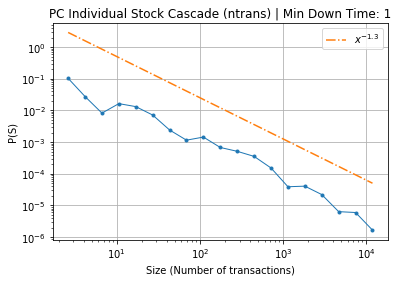

In [50]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*10, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("PC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/7-9/stockcascadesize_ntrans_79o501p1000s100t_minSep1_.png", dpi=250)
plt.show()
plt.close()

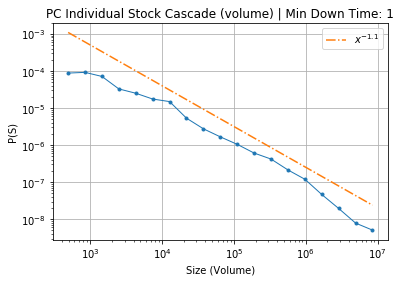

In [51]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.1), '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("PC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/7-9/stockcascadesize_vol_79o501p1000s100t_minSep1_.png", dpi=250)
plt.show()
plt.close()

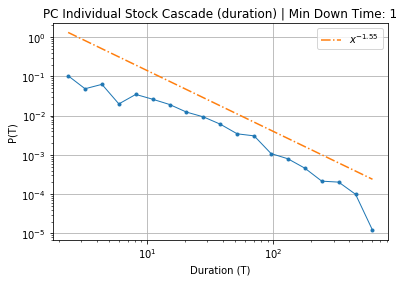

In [52]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*5, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("PC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/7-9/stockcascadesize_duration_79o501p1000s100t_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [9]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersPC, stockPoolPC, minSep=2, t0 = 993, tf = 1992)

In [10]:
for i in range(30):
    sizes = []
    hursts = []
    casc = cascades.findStockOrderCascades(TtotalOrdersPC[['stock']==i])
    

array([5.08334371e+04, 3.05671714e+03, 3.05636429e+04, 2.07513691e+04,
       2.75001605e+06, 4.23456116e+06, 9.80184546e+04, 1.11360542e+06,
       2.06190097e+04, 1.05927796e+05, 5.18906784e+04, 2.81887777e+06,
       4.44783699e+05, 8.06280237e+06, 1.51583455e+05, 2.17537992e+04,
       1.49024215e+05, 3.39877338e+05, 7.30707235e+03, 9.63163948e+03,
       3.98490911e+04, 2.63952948e+06, 6.52451478e+04, 4.98176752e+04,
       3.41044122e+04, 3.45804853e+03, 1.11428065e+04, 3.49578556e+05,
       6.39269604e+06, 3.93808076e+05, 5.14612753e+03, 2.98432992e+05,
       1.20975787e+04, 4.67974329e+05, 1.14073082e+06, 1.16822585e+05,
       7.99613873e+05, 4.45513870e+05, 1.44601551e+03, 2.53021148e+03,
       4.15695161e+03, 7.59130659e+03, 1.80780108e+03, 2.49531394e+04,
       3.25886166e+05, 1.77161004e+06, 1.79267825e+05, 9.12073945e+04,
       1.04133697e+06, 2.57620677e+05, 1.32053893e+06, 1.99304829e+03,
       4.55961492e+05, 8.19805706e+03, 1.60784399e+05, 3.86848283e+04,
      

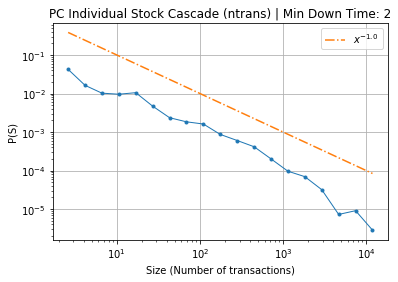

In [53]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("PC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/7-9/stockcascadesize_ntrans_79o501p1000s100t_minSep2_.png", dpi=250)
plt.show()
plt.close()

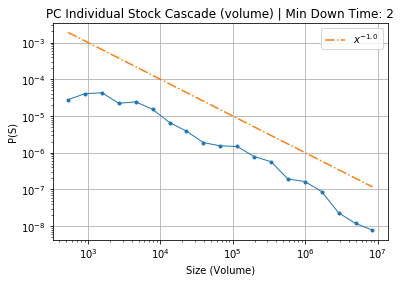

In [54]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("PC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/7-9/stockcascadesize_vol_79o501p1000s100t_minSep2_.png", dpi=250)
plt.show()
plt.close()

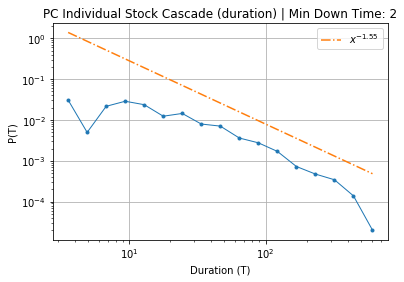

In [55]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*10, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("PC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/7-9/stockcascadesize_duration_79o501p1000s100t_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [17]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersPC, stockPoolPC, 5)

In [56]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("PC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/7-9/stockcascadesize_ntrans_79o501p1000s100t_minSep5_.png", dpi=250)
plt.show()
plt.close()

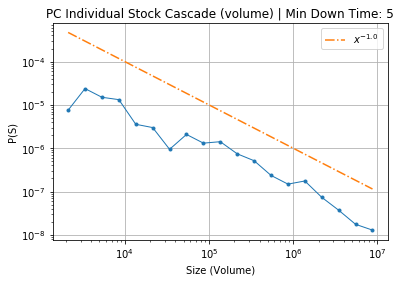

In [57]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("PC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/7-9/stockcascadesize_vol_79o501p1000s100t_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [58]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),12))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*10, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("PC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/7-9/stockcascadesize_duration_79o501p1000s100t_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [21]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersPC, stockPoolPC, 10)

In [60]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("PC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/7-9/stockcascadesize_ntrans_79o501p1000s100t_minSep10_.png", dpi=250)
plt.show()
plt.close()

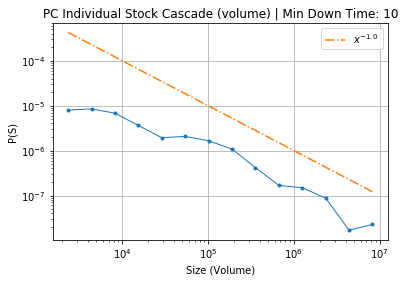

In [61]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("PC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/7-9/stockcascadesize_vol_79o501p1000s100t_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [63]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),10))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.5)*10, '-.', label= "$x^{-1.5}$")
plt.loglog()
plt.legend()
plt.title("PC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/7-9/stockcascadesize_duration_79o501p1000s100t_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [11]:
causalCascades22 = cascades.findCascades(TtotalOrdersPC, traderIDsPC, maxtimeeff = 2, maxSep = 2)
pcsizes22, pcnrows22, pcduration22 = cascades.cascadeAnalyzer(causalCascades22, stockPoolPC, t0=993, tf=1992)

OG Orders left:  1177085
Cascade length:  30616
New Orders left:  1146469
making new cascade
OG Orders left:  1146469
Cascade length:  1
New Orders left:  1146468
making new cascade
OG Orders left:  1146468
Cascade length:  30532
New Orders left:  1115936
making new cascade
OG Orders left:  1115936
Cascade length:  29388
New Orders left:  1086548
making new cascade
OG Orders left:  1086548
Cascade length:  27429
New Orders left:  1059119
making new cascade
OG Orders left:  1059119
Cascade length:  29517
New Orders left:  1029602
making new cascade
OG Orders left:  1029602
Cascade length:  29317
New Orders left:  1000285
making new cascade
OG Orders left:  1000285
Cascade length:  28521
New Orders left:  971764
making new cascade
OG Orders left:  971764
Cascade length:  31252
New Orders left:  940512
making new cascade
OG Orders left:  940512
Cascade length:  25939
New Orders left:  914573
making new cascade
OG Orders left:  914573
Cascade length:  25692
New Orders left:  888881
making 

Cascade length:  14
New Orders left:  401194
making new cascade
OG Orders left:  401194
Cascade length:  9
New Orders left:  401185
making new cascade
OG Orders left:  401185
Cascade length:  6
New Orders left:  401179
making new cascade
OG Orders left:  401179
Cascade length:  7
New Orders left:  401172
making new cascade
OG Orders left:  401172
Cascade length:  33
New Orders left:  401139
making new cascade
OG Orders left:  401139
Cascade length:  5
New Orders left:  401134
making new cascade
OG Orders left:  401134
Cascade length:  19
New Orders left:  401115
making new cascade
OG Orders left:  401115
Cascade length:  21
New Orders left:  401094
making new cascade
OG Orders left:  401094
Cascade length:  7940
New Orders left:  393154
making new cascade
OG Orders left:  393154
Cascade length:  7285
New Orders left:  385869
making new cascade
OG Orders left:  385869
Cascade length:  20
New Orders left:  385849
making new cascade
OG Orders left:  385849
Cascade length:  24
New Orders l

Cascade length:  19
New Orders left:  229024
making new cascade
OG Orders left:  229024
Cascade length:  3747
New Orders left:  225277
making new cascade
OG Orders left:  225277
Cascade length:  4390
New Orders left:  220887
making new cascade
OG Orders left:  220887
Cascade length:  4027
New Orders left:  216860
making new cascade
OG Orders left:  216860
Cascade length:  36
New Orders left:  216824
making new cascade
OG Orders left:  216824
Cascade length:  4196
New Orders left:  212628
making new cascade
OG Orders left:  212628
Cascade length:  3735
New Orders left:  208893
making new cascade
OG Orders left:  208893
Cascade length:  4
New Orders left:  208889
making new cascade
OG Orders left:  208889
Cascade length:  4354
New Orders left:  204535
making new cascade
OG Orders left:  204535
Cascade length:  19
New Orders left:  204516
making new cascade
OG Orders left:  204516
Cascade length:  3831
New Orders left:  200685
making new cascade
OG Orders left:  200685
Cascade length:  8


Cascade length:  7
New Orders left:  70430
making new cascade
OG Orders left:  70430
Cascade length:  8
New Orders left:  70422
making new cascade
OG Orders left:  70422
Cascade length:  17
New Orders left:  70405
making new cascade
OG Orders left:  70405
Cascade length:  20
New Orders left:  70385
making new cascade
OG Orders left:  70385
Cascade length:  124
New Orders left:  70261
making new cascade
OG Orders left:  70261
Cascade length:  53
New Orders left:  70208
making new cascade
OG Orders left:  70208
Cascade length:  10
New Orders left:  70198
making new cascade
OG Orders left:  70198
Cascade length:  3494
New Orders left:  66704
making new cascade
OG Orders left:  66704
Cascade length:  8
New Orders left:  66696
making new cascade
OG Orders left:  66696
Cascade length:  7
New Orders left:  66689
making new cascade
OG Orders left:  66689
Cascade length:  18
New Orders left:  66671
making new cascade
OG Orders left:  66671
Cascade length:  12
New Orders left:  66659
making new 

making new cascade
OG Orders left:  31074
Cascade length:  8
New Orders left:  31066
making new cascade
OG Orders left:  31066
Cascade length:  87
New Orders left:  30979
making new cascade
OG Orders left:  30979
Cascade length:  2
New Orders left:  30977
making new cascade
OG Orders left:  30977
Cascade length:  452
New Orders left:  30525
making new cascade
OG Orders left:  30525
Cascade length:  6
New Orders left:  30519
making new cascade
OG Orders left:  30519
Cascade length:  643
New Orders left:  29876
making new cascade
OG Orders left:  29876
Cascade length:  2
New Orders left:  29874
making new cascade
OG Orders left:  29874
Cascade length:  397
New Orders left:  29477
making new cascade
OG Orders left:  29477
Cascade length:  445
New Orders left:  29032
making new cascade
OG Orders left:  29032
Cascade length:  13
New Orders left:  29019
making new cascade
OG Orders left:  29019
Cascade length:  15
New Orders left:  29004
making new cascade
OG Orders left:  29004
Cascade leng

Cascade length:  169
New Orders left:  22315
making new cascade
OG Orders left:  22315
Cascade length:  4
New Orders left:  22311
making new cascade
OG Orders left:  22311
Cascade length:  79
New Orders left:  22232
making new cascade
OG Orders left:  22232
Cascade length:  420
New Orders left:  21812
making new cascade
OG Orders left:  21812
Cascade length:  39
New Orders left:  21773
making new cascade
OG Orders left:  21773
Cascade length:  364
New Orders left:  21409
making new cascade
OG Orders left:  21409
Cascade length:  4
New Orders left:  21405
making new cascade
OG Orders left:  21405
Cascade length:  190
New Orders left:  21215
making new cascade
OG Orders left:  21215
Cascade length:  164
New Orders left:  21051
making new cascade
OG Orders left:  21051
Cascade length:  313
New Orders left:  20738
making new cascade
OG Orders left:  20738
Cascade length:  370
New Orders left:  20368
making new cascade
OG Orders left:  20368
Cascade length:  14
New Orders left:  20354
makin

Cascade length:  179
New Orders left:  11585
making new cascade
OG Orders left:  11585
Cascade length:  293
New Orders left:  11292
making new cascade
OG Orders left:  11292
Cascade length:  114
New Orders left:  11178
making new cascade
OG Orders left:  11178
Cascade length:  335
New Orders left:  10843
making new cascade
OG Orders left:  10843
Cascade length:  2
New Orders left:  10841
making new cascade
OG Orders left:  10841
Cascade length:  32
New Orders left:  10809
making new cascade
OG Orders left:  10809
Cascade length:  2
New Orders left:  10807
making new cascade
OG Orders left:  10807
Cascade length:  190
New Orders left:  10617
making new cascade
OG Orders left:  10617
Cascade length:  24
New Orders left:  10593
making new cascade
OG Orders left:  10593
Cascade length:  8
New Orders left:  10585
making new cascade
OG Orders left:  10585
Cascade length:  12
New Orders left:  10573
making new cascade
OG Orders left:  10573
Cascade length:  2
New Orders left:  10571
making ne

Cascade length:  15
New Orders left:  3789
making new cascade
OG Orders left:  3789
Cascade length:  7
New Orders left:  3782
making new cascade
OG Orders left:  3782
Cascade length:  5
New Orders left:  3777
making new cascade
OG Orders left:  3777
Cascade length:  3
New Orders left:  3774
making new cascade
OG Orders left:  3774
Cascade length:  8
New Orders left:  3766
making new cascade
OG Orders left:  3766
Cascade length:  11
New Orders left:  3755
making new cascade
OG Orders left:  3755
Cascade length:  27
New Orders left:  3728
making new cascade
OG Orders left:  3728
Cascade length:  6
New Orders left:  3722
making new cascade
OG Orders left:  3722
Cascade length:  4
New Orders left:  3718
making new cascade
OG Orders left:  3718
Cascade length:  157
New Orders left:  3561
making new cascade
OG Orders left:  3561
Cascade length:  20
New Orders left:  3541
making new cascade
OG Orders left:  3541
Cascade length:  95
New Orders left:  3446
making new cascade
OG Orders left:  34

       18.]), 787: array([69.,  1., 87., 39., 69.,  1., 87., 69.,  1., 87.]), 788: array([ 7., 10., 11.,  7., 10., 11.]), 789: array([43., 52., 47.,  0., 67., 66., 58.]), 790: array([98., 56., 16., 49., 90.])}
{0: array(['eorqn', 'mldxq', 'elcnh', 'xdlhu', 'ednzu', 'xvmbp', 'ptuya',
       'oubpv', 'frems', 'ytvdn', 'forqu', 'wsxlp', 'zbufa', 'kzwdq',
       'pswvy', 'aorxv', 'xzoqp', 'aglux', 'xpgia', 'msewr', 'wdlak',
       'lgbxu', 'wienz', 'jymkq', 'lbegq', 'qjosm', 'tompd', 'klsev',
       'gojcd', 'uofla', 'whkfl', 'gczhm', 'iyvcw', 'xqdyp', 'rqpyw',
       'fhspa', 'flaud', 'mkbuq', 'unxkh', 'ofaty', 'dnoik', 'dgjyo',
       'iqcmp', 'ceydq', 'usyro', 'xjely', 'ongfi', 'sfque', 'osugw',
       'srnpd', 'zxhni', 'xguhs', 'dlvkq', 'ngcej', 'kbpuv', 'gdxkb',
       'uphbc', 'mscof', 'hymke', 'hgnys', 'zjfkm', 'lyeqk', 'hyfgx',
       'wzqro', 'vfisj', 'dizpr', 'lpouf', 'irnge', 'gndbw', 'nlhby',
       'qhzui', 'huxvt', 'zgoib', 'jikot', 'wxcge', 'uobjx', 'flvaz',
       'wkegx', 

In [12]:
causalCascades21 = cascades.findCascades(TtotalOrdersPC, traderIDsPC, maxtimeeff = 2, maxSep = 1)
pcsizes21, pcnrows21, pcduration21 = cascades.cascadeAnalyzer(causalCascades21, stockPoolPC, t0=993, tf=1992)

OG Orders left:  1177085
Cascade length:  6438
New Orders left:  1170647
making new cascade
OG Orders left:  1170647
Cascade length:  6555
New Orders left:  1164092
making new cascade
OG Orders left:  1164092
Cascade length:  6816
New Orders left:  1157276
making new cascade
OG Orders left:  1157276
Cascade length:  6878
New Orders left:  1150398
making new cascade
OG Orders left:  1150398
Cascade length:  6593
New Orders left:  1143805
making new cascade
OG Orders left:  1143805
Cascade length:  6020
New Orders left:  1137785
making new cascade
OG Orders left:  1137785
Cascade length:  6337
New Orders left:  1131448
making new cascade
OG Orders left:  1131448
Cascade length:  6
New Orders left:  1131442
making new cascade
OG Orders left:  1131442
Cascade length:  5597
New Orders left:  1125845
making new cascade
OG Orders left:  1125845
Cascade length:  6073
New Orders left:  1119772
making new cascade
OG Orders left:  1119772
Cascade length:  6714
New Orders left:  1113058
making new

Cascade length:  7108
New Orders left:  831783
making new cascade
OG Orders left:  831783
Cascade length:  2
New Orders left:  831781
making new cascade
OG Orders left:  831781
Cascade length:  10
New Orders left:  831771
making new cascade
OG Orders left:  831771
Cascade length:  10
New Orders left:  831761
making new cascade
OG Orders left:  831761
Cascade length:  12
New Orders left:  831749
making new cascade
OG Orders left:  831749
Cascade length:  7937
New Orders left:  823812
making new cascade
OG Orders left:  823812
Cascade length:  7962
New Orders left:  815850
making new cascade
OG Orders left:  815850
Cascade length:  21
New Orders left:  815829
making new cascade
OG Orders left:  815829
Cascade length:  4
New Orders left:  815825
making new cascade
OG Orders left:  815825
Cascade length:  7628
New Orders left:  808197
making new cascade
OG Orders left:  808197
Cascade length:  3
New Orders left:  808194
making new cascade
OG Orders left:  808194
Cascade length:  7845
New O

Cascade length:  4
New Orders left:  618302
making new cascade
OG Orders left:  618302
Cascade length:  4
New Orders left:  618298
making new cascade
OG Orders left:  618298
Cascade length:  6133
New Orders left:  612165
making new cascade
OG Orders left:  612165
Cascade length:  7
New Orders left:  612158
making new cascade
OG Orders left:  612158
Cascade length:  9
New Orders left:  612149
making new cascade
OG Orders left:  612149
Cascade length:  7094
New Orders left:  605055
making new cascade
OG Orders left:  605055
Cascade length:  6584
New Orders left:  598471
making new cascade
OG Orders left:  598471
Cascade length:  10
New Orders left:  598461
making new cascade
OG Orders left:  598461
Cascade length:  2
New Orders left:  598459
making new cascade
OG Orders left:  598459
Cascade length:  6519
New Orders left:  591940
making new cascade
OG Orders left:  591940
Cascade length:  4
New Orders left:  591936
making new cascade
OG Orders left:  591936
Cascade length:  6120
New Orde

Cascade length:  6
New Orders left:  449087
making new cascade
OG Orders left:  449087
Cascade length:  4
New Orders left:  449083
making new cascade
OG Orders left:  449083
Cascade length:  4557
New Orders left:  444526
making new cascade
OG Orders left:  444526
Cascade length:  3
New Orders left:  444523
making new cascade
OG Orders left:  444523
Cascade length:  4259
New Orders left:  440264
making new cascade
OG Orders left:  440264
Cascade length:  13
New Orders left:  440251
making new cascade
OG Orders left:  440251
Cascade length:  4460
New Orders left:  435791
making new cascade
OG Orders left:  435791
Cascade length:  4709
New Orders left:  431082
making new cascade
OG Orders left:  431082
Cascade length:  4
New Orders left:  431078
making new cascade
OG Orders left:  431078
Cascade length:  6
New Orders left:  431072
making new cascade
OG Orders left:  431072
Cascade length:  8
New Orders left:  431064
making new cascade
OG Orders left:  431064
Cascade length:  4176
New Orde

Cascade length:  2
New Orders left:  281138
making new cascade
OG Orders left:  281138
Cascade length:  11
New Orders left:  281127
making new cascade
OG Orders left:  281127
Cascade length:  3028
New Orders left:  278099
making new cascade
OG Orders left:  278099
Cascade length:  2813
New Orders left:  275286
making new cascade
OG Orders left:  275286
Cascade length:  11
New Orders left:  275275
making new cascade
OG Orders left:  275275
Cascade length:  3093
New Orders left:  272182
making new cascade
OG Orders left:  272182
Cascade length:  2
New Orders left:  272180
making new cascade
OG Orders left:  272180
Cascade length:  2600
New Orders left:  269580
making new cascade
OG Orders left:  269580
Cascade length:  6
New Orders left:  269574
making new cascade
OG Orders left:  269574
Cascade length:  1
New Orders left:  269573
making new cascade
OG Orders left:  269573
Cascade length:  28
New Orders left:  269545
making new cascade
OG Orders left:  269545
Cascade length:  3056
New Or

Cascade length:  2
New Orders left:  172814
making new cascade
OG Orders left:  172814
Cascade length:  2414
New Orders left:  170400
making new cascade
OG Orders left:  170400
Cascade length:  5
New Orders left:  170395
making new cascade
OG Orders left:  170395
Cascade length:  103
New Orders left:  170292
making new cascade
OG Orders left:  170292
Cascade length:  8
New Orders left:  170284
making new cascade
OG Orders left:  170284
Cascade length:  9
New Orders left:  170275
making new cascade
OG Orders left:  170275
Cascade length:  2434
New Orders left:  167841
making new cascade
OG Orders left:  167841
Cascade length:  2442
New Orders left:  165399
making new cascade
OG Orders left:  165399
Cascade length:  44
New Orders left:  165355
making new cascade
OG Orders left:  165355
Cascade length:  35
New Orders left:  165320
making new cascade
OG Orders left:  165320
Cascade length:  2323
New Orders left:  162997
making new cascade
OG Orders left:  162997
Cascade length:  29
New Ord

Cascade length:  2068
New Orders left:  97954
making new cascade
OG Orders left:  97954
Cascade length:  115
New Orders left:  97839
making new cascade
OG Orders left:  97839
Cascade length:  1892
New Orders left:  95947
making new cascade
OG Orders left:  95947
Cascade length:  2120
New Orders left:  93827
making new cascade
OG Orders left:  93827
Cascade length:  2196
New Orders left:  91631
making new cascade
OG Orders left:  91631
Cascade length:  1
New Orders left:  91630
making new cascade
OG Orders left:  91630
Cascade length:  36
New Orders left:  91594
making new cascade
OG Orders left:  91594
Cascade length:  2184
New Orders left:  89410
making new cascade
OG Orders left:  89410
Cascade length:  8
New Orders left:  89402
making new cascade
OG Orders left:  89402
Cascade length:  69
New Orders left:  89333
making new cascade
OG Orders left:  89333
Cascade length:  1997
New Orders left:  87336
making new cascade
OG Orders left:  87336
Cascade length:  21
New Orders left:  87315

Cascade length:  42
New Orders left:  40330
making new cascade
OG Orders left:  40330
Cascade length:  332
New Orders left:  39998
making new cascade
OG Orders left:  39998
Cascade length:  26
New Orders left:  39972
making new cascade
OG Orders left:  39972
Cascade length:  303
New Orders left:  39669
making new cascade
OG Orders left:  39669
Cascade length:  417
New Orders left:  39252
making new cascade
OG Orders left:  39252
Cascade length:  11
New Orders left:  39241
making new cascade
OG Orders left:  39241
Cascade length:  53
New Orders left:  39188
making new cascade
OG Orders left:  39188
Cascade length:  11
New Orders left:  39177
making new cascade
OG Orders left:  39177
Cascade length:  206
New Orders left:  38971
making new cascade
OG Orders left:  38971
Cascade length:  16
New Orders left:  38955
making new cascade
OG Orders left:  38955
Cascade length:  154
New Orders left:  38801
making new cascade
OG Orders left:  38801
Cascade length:  537
New Orders left:  38264
maki

Cascade length:  23
New Orders left:  22343
making new cascade
OG Orders left:  22343
Cascade length:  207
New Orders left:  22136
making new cascade
OG Orders left:  22136
Cascade length:  10
New Orders left:  22126
making new cascade
OG Orders left:  22126
Cascade length:  178
New Orders left:  21948
making new cascade
OG Orders left:  21948
Cascade length:  298
New Orders left:  21650
making new cascade
OG Orders left:  21650
Cascade length:  166
New Orders left:  21484
making new cascade
OG Orders left:  21484
Cascade length:  216
New Orders left:  21268
making new cascade
OG Orders left:  21268
Cascade length:  224
New Orders left:  21044
making new cascade
OG Orders left:  21044
Cascade length:  8
New Orders left:  21036
making new cascade
OG Orders left:  21036
Cascade length:  383
New Orders left:  20653
making new cascade
OG Orders left:  20653
Cascade length:  26
New Orders left:  20627
making new cascade
OG Orders left:  20627
Cascade length:  22
New Orders left:  20605
maki

Cascade length:  150
New Orders left:  11652
making new cascade
OG Orders left:  11652
Cascade length:  9
New Orders left:  11643
making new cascade
OG Orders left:  11643
Cascade length:  23
New Orders left:  11620
making new cascade
OG Orders left:  11620
Cascade length:  2
New Orders left:  11618
making new cascade
OG Orders left:  11618
Cascade length:  143
New Orders left:  11475
making new cascade
OG Orders left:  11475
Cascade length:  170
New Orders left:  11305
making new cascade
OG Orders left:  11305
Cascade length:  13
New Orders left:  11292
making new cascade
OG Orders left:  11292
Cascade length:  7
New Orders left:  11285
making new cascade
OG Orders left:  11285
Cascade length:  152
New Orders left:  11133
making new cascade
OG Orders left:  11133
Cascade length:  13
New Orders left:  11120
making new cascade
OG Orders left:  11120
Cascade length:  268
New Orders left:  10852
making new cascade
OG Orders left:  10852
Cascade length:  278
New Orders left:  10574
making 

Cascade length:  120
New Orders left:  4531
making new cascade
OG Orders left:  4531
Cascade length:  18
New Orders left:  4513
making new cascade
OG Orders left:  4513
Cascade length:  3
New Orders left:  4510
making new cascade
OG Orders left:  4510
Cascade length:  201
New Orders left:  4309
making new cascade
OG Orders left:  4309
Cascade length:  26
New Orders left:  4283
making new cascade
OG Orders left:  4283
Cascade length:  65
New Orders left:  4218
making new cascade
OG Orders left:  4218
Cascade length:  29
New Orders left:  4189
making new cascade
OG Orders left:  4189
Cascade length:  4
New Orders left:  4185
making new cascade
OG Orders left:  4185
Cascade length:  23
New Orders left:  4162
making new cascade
OG Orders left:  4162
Cascade length:  19
New Orders left:  4143
making new cascade
OG Orders left:  4143
Cascade length:  68
New Orders left:  4075
making new cascade
OG Orders left:  4075
Cascade length:  4
New Orders left:  4071
making new cascade
OG Orders left:

Cascade length:  28
New Orders left:  533
making new cascade
OG Orders left:  533
Cascade length:  8
New Orders left:  525
making new cascade
OG Orders left:  525
Cascade length:  33
New Orders left:  492
making new cascade
OG Orders left:  492
Cascade length:  19
New Orders left:  473
making new cascade
OG Orders left:  473
Cascade length:  15
New Orders left:  458
making new cascade
OG Orders left:  458
Cascade length:  38
New Orders left:  420
making new cascade
OG Orders left:  420
Cascade length:  42
New Orders left:  378
making new cascade
OG Orders left:  378
Cascade length:  16
New Orders left:  362
making new cascade
OG Orders left:  362
Cascade length:  27
New Orders left:  335
making new cascade
OG Orders left:  335
Cascade length:  12
New Orders left:  323
making new cascade
OG Orders left:  323
Cascade length:  26
New Orders left:  297
making new cascade
OG Orders left:  297
Cascade length:  37
New Orders left:  260
making new cascade
OG Orders left:  260
Cascade length:  

In [13]:
causalCascades12 = cascades.findCascades(TtotalOrdersPC, traderIDsPC, maxtimeeff = 1, maxSep = 2)
pcsizes12, pcnrows12, pcduration12 = cascades.cascadeAnalyzer(causalCascades12, stockPoolPC, t0=993, tf=1992)

OG Orders left:  1177085
Cascade length:  30616
New Orders left:  1146469
making new cascade
OG Orders left:  1146469
Cascade length:  1
New Orders left:  1146468
making new cascade
OG Orders left:  1146468
Cascade length:  30532
New Orders left:  1115936
making new cascade
OG Orders left:  1115936
Cascade length:  29358
New Orders left:  1086578
making new cascade
OG Orders left:  1086578
Cascade length:  27334
New Orders left:  1059244
making new cascade
OG Orders left:  1059244
Cascade length:  29594
New Orders left:  1029650
making new cascade
OG Orders left:  1029650
Cascade length:  29266
New Orders left:  1000384
making new cascade
OG Orders left:  1000384
Cascade length:  28509
New Orders left:  971875
making new cascade
OG Orders left:  971875
Cascade length:  31380
New Orders left:  940495
making new cascade
OG Orders left:  940495
Cascade length:  25899
New Orders left:  914596
making new cascade
OG Orders left:  914596
Cascade length:  4
New Orders left:  914592
making new 

Cascade length:  7911
New Orders left:  422967
making new cascade
OG Orders left:  422967
Cascade length:  6
New Orders left:  422961
making new cascade
OG Orders left:  422961
Cascade length:  15
New Orders left:  422946
making new cascade
OG Orders left:  422946
Cascade length:  7
New Orders left:  422939
making new cascade
OG Orders left:  422939
Cascade length:  9
New Orders left:  422930
making new cascade
OG Orders left:  422930
Cascade length:  6
New Orders left:  422924
making new cascade
OG Orders left:  422924
Cascade length:  24
New Orders left:  422900
making new cascade
OG Orders left:  422900
Cascade length:  5
New Orders left:  422895
making new cascade
OG Orders left:  422895
Cascade length:  168
New Orders left:  422727
making new cascade
OG Orders left:  422727
Cascade length:  41
New Orders left:  422686
making new cascade
OG Orders left:  422686
Cascade length:  6241
New Orders left:  416445
making new cascade
OG Orders left:  416445
Cascade length:  6948
New Orders

Cascade length:  3894
New Orders left:  240523
making new cascade
OG Orders left:  240523
Cascade length:  3854
New Orders left:  236669
making new cascade
OG Orders left:  236669
Cascade length:  4
New Orders left:  236665
making new cascade
OG Orders left:  236665
Cascade length:  29
New Orders left:  236636
making new cascade
OG Orders left:  236636
Cascade length:  19
New Orders left:  236617
making new cascade
OG Orders left:  236617
Cascade length:  4393
New Orders left:  232224
making new cascade
OG Orders left:  232224
Cascade length:  16
New Orders left:  232208
making new cascade
OG Orders left:  232208
Cascade length:  3806
New Orders left:  228402
making new cascade
OG Orders left:  228402
Cascade length:  4480
New Orders left:  223922
making new cascade
OG Orders left:  223922
Cascade length:  38
New Orders left:  223884
making new cascade
OG Orders left:  223884
Cascade length:  3610
New Orders left:  220274
making new cascade
OG Orders left:  220274
Cascade length:  22
N

Cascade length:  3593
New Orders left:  112181
making new cascade
OG Orders left:  112181
Cascade length:  3933
New Orders left:  108248
making new cascade
OG Orders left:  108248
Cascade length:  68
New Orders left:  108180
making new cascade
OG Orders left:  108180
Cascade length:  3636
New Orders left:  104544
making new cascade
OG Orders left:  104544
Cascade length:  8
New Orders left:  104536
making new cascade
OG Orders left:  104536
Cascade length:  4168
New Orders left:  100368
making new cascade
OG Orders left:  100368
Cascade length:  8
New Orders left:  100360
making new cascade
OG Orders left:  100360
Cascade length:  140
New Orders left:  100220
making new cascade
OG Orders left:  100220
Cascade length:  116
New Orders left:  100104
making new cascade
OG Orders left:  100104
Cascade length:  3067
New Orders left:  97037
making new cascade
OG Orders left:  97037
Cascade length:  7
New Orders left:  97030
making new cascade
OG Orders left:  97030
Cascade length:  10
New Ord

Cascade length:  658
New Orders left:  44959
making new cascade
OG Orders left:  44959
Cascade length:  17
New Orders left:  44942
making new cascade
OG Orders left:  44942
Cascade length:  20
New Orders left:  44922
making new cascade
OG Orders left:  44922
Cascade length:  21
New Orders left:  44901
making new cascade
OG Orders left:  44901
Cascade length:  74
New Orders left:  44827
making new cascade
OG Orders left:  44827
Cascade length:  15
New Orders left:  44812
making new cascade
OG Orders left:  44812
Cascade length:  237
New Orders left:  44575
making new cascade
OG Orders left:  44575
Cascade length:  964
New Orders left:  43611
making new cascade
OG Orders left:  43611
Cascade length:  624
New Orders left:  42987
making new cascade
OG Orders left:  42987
Cascade length:  633
New Orders left:  42354
making new cascade
OG Orders left:  42354
Cascade length:  793
New Orders left:  41561
making new cascade
OG Orders left:  41561
Cascade length:  655
New Orders left:  40906
mak

Cascade length:  357
New Orders left:  21973
making new cascade
OG Orders left:  21973
Cascade length:  597
New Orders left:  21376
making new cascade
OG Orders left:  21376
Cascade length:  653
New Orders left:  20723
making new cascade
OG Orders left:  20723
Cascade length:  160
New Orders left:  20563
making new cascade
OG Orders left:  20563
Cascade length:  5
New Orders left:  20558
making new cascade
OG Orders left:  20558
Cascade length:  360
New Orders left:  20198
making new cascade
OG Orders left:  20198
Cascade length:  3
New Orders left:  20195
making new cascade
OG Orders left:  20195
Cascade length:  91
New Orders left:  20104
making new cascade
OG Orders left:  20104
Cascade length:  9
New Orders left:  20095
making new cascade
OG Orders left:  20095
Cascade length:  532
New Orders left:  19563
making new cascade
OG Orders left:  19563
Cascade length:  10
New Orders left:  19553
making new cascade
OG Orders left:  19553
Cascade length:  5
New Orders left:  19548
making n

Cascade length:  323
New Orders left:  11015
making new cascade
OG Orders left:  11015
Cascade length:  371
New Orders left:  10644
making new cascade
OG Orders left:  10644
Cascade length:  427
New Orders left:  10217
making new cascade
OG Orders left:  10217
Cascade length:  15
New Orders left:  10202
making new cascade
OG Orders left:  10202
Cascade length:  153
New Orders left:  10049
making new cascade
OG Orders left:  10049
Cascade length:  6
New Orders left:  10043
making new cascade
OG Orders left:  10043
Cascade length:  52
New Orders left:  9991
making new cascade
OG Orders left:  9991
Cascade length:  50
New Orders left:  9941
making new cascade
OG Orders left:  9941
Cascade length:  10
New Orders left:  9931
making new cascade
OG Orders left:  9931
Cascade length:  255
New Orders left:  9676
making new cascade
OG Orders left:  9676
Cascade length:  29
New Orders left:  9647
making new cascade
OG Orders left:  9647
Cascade length:  19
New Orders left:  9628
making new cascad

{0: array([ 1.,  2.,  4.,  6.,  1.,  2.,  3.,  4.,  6.,  1.,  2.,  3.,  4.,
        6., 10., 11., 13., 14., 15., 18., 19., 17., 20., 24., 25., 28.,
       27., 30., 31., 32., 33., 35., 40., 41., 43., 36., 44., 45., 50.,
       51., 53., 54., 56., 57., 59., 60., 62., 66., 68., 95., 89., 85.,
       55., 74., 26., 72., 78., 99., 92., 90., 98., 83., 94., 73., 91.,
       86., 77., 75., 80., 34., 88., 22., 64., 71., 48., 70.,  7., 52.]), 1: array([72.]), 2: array([75., 77., 83., 78., 85., 86., 89., 90., 92., 94., 95., 88., 91.,
       98., 99., 66., 20., 31.,  4.,  1., 43., 13., 68., 19., 18., 30.,
       28., 53., 33., 60., 10., 24., 55., 41., 35., 36., 14., 40., 56.,
       51., 62., 73., 50.,  3., 54., 15., 72., 57., 74., 45., 44.,  6.,
        2., 59., 11., 32., 27., 52., 71., 22., 64., 25., 80., 34., 21.,
       17., 49., 48., 26.]), 3: array([75., 77., 78., 83., 85., 86., 88., 89., 60., 14., 94., 73., 33.,
       50., 19.,  2., 24., 35., 74., 72.,  6., 27., 57., 28., 66., 90.,
      

In [14]:
causalCascades11 = cascades.findCascades(TtotalOrdersPC, traderIDsPC, maxtimeeff = 1, maxSep = 1)
pcsizes11, pcnrows11, pcduration11 = cascades.cascadeAnalyzer(causalCascades11, stockPoolPC, t0=993, tf=1992)

OG Orders left:  1177085
Cascade length:  6438
New Orders left:  1170647
making new cascade
OG Orders left:  1170647
Cascade length:  1
New Orders left:  1170646
making new cascade
OG Orders left:  1170646
Cascade length:  6828
New Orders left:  1163818
making new cascade
OG Orders left:  1163818
Cascade length:  6798
New Orders left:  1157020
making new cascade
OG Orders left:  1157020
Cascade length:  6895
New Orders left:  1150125
making new cascade
OG Orders left:  1150125
Cascade length:  6663
New Orders left:  1143462
making new cascade
OG Orders left:  1143462
Cascade length:  5950
New Orders left:  1137512
making new cascade
OG Orders left:  1137512
Cascade length:  6
New Orders left:  1137506
making new cascade
OG Orders left:  1137506
Cascade length:  6390
New Orders left:  1131116
making new cascade
OG Orders left:  1131116
Cascade length:  5622
New Orders left:  1125494
making new cascade
OG Orders left:  1125494
Cascade length:  5914
New Orders left:  1119580
making new ca

Cascade length:  4
New Orders left:  888014
making new cascade
OG Orders left:  888014
Cascade length:  7857
New Orders left:  880157
making new cascade
OG Orders left:  880157
Cascade length:  21
New Orders left:  880136
making new cascade
OG Orders left:  880136
Cascade length:  98
New Orders left:  880038
making new cascade
OG Orders left:  880038
Cascade length:  6
New Orders left:  880032
making new cascade
OG Orders left:  880032
Cascade length:  4
New Orders left:  880028
making new cascade
OG Orders left:  880028
Cascade length:  6
New Orders left:  880022
making new cascade
OG Orders left:  880022
Cascade length:  5
New Orders left:  880017
making new cascade
OG Orders left:  880017
Cascade length:  6171
New Orders left:  873846
making new cascade
OG Orders left:  873846
Cascade length:  9
New Orders left:  873837
making new cascade
OG Orders left:  873837
Cascade length:  5857
New Orders left:  867980
making new cascade
OG Orders left:  867980
Cascade length:  6
New Orders le

Cascade length:  2
New Orders left:  677997
making new cascade
OG Orders left:  677997
Cascade length:  8
New Orders left:  677989
making new cascade
OG Orders left:  677989
Cascade length:  6159
New Orders left:  671830
making new cascade
OG Orders left:  671830
Cascade length:  3
New Orders left:  671827
making new cascade
OG Orders left:  671827
Cascade length:  5960
New Orders left:  665867
making new cascade
OG Orders left:  665867
Cascade length:  4
New Orders left:  665863
making new cascade
OG Orders left:  665863
Cascade length:  4
New Orders left:  665859
making new cascade
OG Orders left:  665859
Cascade length:  6277
New Orders left:  659582
making new cascade
OG Orders left:  659582
Cascade length:  6643
New Orders left:  652939
making new cascade
OG Orders left:  652939
Cascade length:  6
New Orders left:  652933
making new cascade
OG Orders left:  652933
Cascade length:  3
New Orders left:  652930
making new cascade
OG Orders left:  652930
Cascade length:  7046
New Order

Cascade length:  4234
New Orders left:  460439
making new cascade
OG Orders left:  460439
Cascade length:  7
New Orders left:  460432
making new cascade
OG Orders left:  460432
Cascade length:  3545
New Orders left:  456887
making new cascade
OG Orders left:  456887
Cascade length:  5
New Orders left:  456882
making new cascade
OG Orders left:  456882
Cascade length:  3785
New Orders left:  453097
making new cascade
OG Orders left:  453097
Cascade length:  3826
New Orders left:  449271
making new cascade
OG Orders left:  449271
Cascade length:  6
New Orders left:  449265
making new cascade
OG Orders left:  449265
Cascade length:  3940
New Orders left:  445325
making new cascade
OG Orders left:  445325
Cascade length:  4297
New Orders left:  441028
making new cascade
OG Orders left:  441028
Cascade length:  34
New Orders left:  440994
making new cascade
OG Orders left:  440994
Cascade length:  1
New Orders left:  440993
making new cascade
OG Orders left:  440993
Cascade length:  1
New O

Cascade length:  3869
New Orders left:  316557
making new cascade
OG Orders left:  316557
Cascade length:  3
New Orders left:  316554
making new cascade
OG Orders left:  316554
Cascade length:  3815
New Orders left:  312739
making new cascade
OG Orders left:  312739
Cascade length:  3704
New Orders left:  309035
making new cascade
OG Orders left:  309035
Cascade length:  19
New Orders left:  309016
making new cascade
OG Orders left:  309016
Cascade length:  2
New Orders left:  309014
making new cascade
OG Orders left:  309014
Cascade length:  3278
New Orders left:  305736
making new cascade
OG Orders left:  305736
Cascade length:  1
New Orders left:  305735
making new cascade
OG Orders left:  305735
Cascade length:  37
New Orders left:  305698
making new cascade
OG Orders left:  305698
Cascade length:  3734
New Orders left:  301964
making new cascade
OG Orders left:  301964
Cascade length:  11
New Orders left:  301953
making new cascade
OG Orders left:  301953
Cascade length:  3426
New

Cascade length:  72
New Orders left:  186307
making new cascade
OG Orders left:  186307
Cascade length:  6
New Orders left:  186301
making new cascade
OG Orders left:  186301
Cascade length:  6
New Orders left:  186295
making new cascade
OG Orders left:  186295
Cascade length:  8
New Orders left:  186287
making new cascade
OG Orders left:  186287
Cascade length:  4
New Orders left:  186283
making new cascade
OG Orders left:  186283
Cascade length:  3
New Orders left:  186280
making new cascade
OG Orders left:  186280
Cascade length:  13
New Orders left:  186267
making new cascade
OG Orders left:  186267
Cascade length:  5
New Orders left:  186262
making new cascade
OG Orders left:  186262
Cascade length:  50
New Orders left:  186212
making new cascade
OG Orders left:  186212
Cascade length:  12
New Orders left:  186200
making new cascade
OG Orders left:  186200
Cascade length:  6
New Orders left:  186194
making new cascade
OG Orders left:  186194
Cascade length:  2238
New Orders left: 

Cascade length:  1448
New Orders left:  96851
making new cascade
OG Orders left:  96851
Cascade length:  1685
New Orders left:  95166
making new cascade
OG Orders left:  95166
Cascade length:  902
New Orders left:  94264
making new cascade
OG Orders left:  94264
Cascade length:  4
New Orders left:  94260
making new cascade
OG Orders left:  94260
Cascade length:  1369
New Orders left:  92891
making new cascade
OG Orders left:  92891
Cascade length:  26
New Orders left:  92865
making new cascade
OG Orders left:  92865
Cascade length:  710
New Orders left:  92155
making new cascade
OG Orders left:  92155
Cascade length:  28
New Orders left:  92127
making new cascade
OG Orders left:  92127
Cascade length:  1296
New Orders left:  90831
making new cascade
OG Orders left:  90831
Cascade length:  20
New Orders left:  90811
making new cascade
OG Orders left:  90811
Cascade length:  1672
New Orders left:  89139
making new cascade
OG Orders left:  89139
Cascade length:  50
New Orders left:  89089

Cascade length:  162
New Orders left:  56072
making new cascade
OG Orders left:  56072
Cascade length:  3
New Orders left:  56069
making new cascade
OG Orders left:  56069
Cascade length:  780
New Orders left:  55289
making new cascade
OG Orders left:  55289
Cascade length:  607
New Orders left:  54682
making new cascade
OG Orders left:  54682
Cascade length:  24
New Orders left:  54658
making new cascade
OG Orders left:  54658
Cascade length:  6
New Orders left:  54652
making new cascade
OG Orders left:  54652
Cascade length:  14
New Orders left:  54638
making new cascade
OG Orders left:  54638
Cascade length:  64
New Orders left:  54574
making new cascade
OG Orders left:  54574
Cascade length:  12
New Orders left:  54562
making new cascade
OG Orders left:  54562
Cascade length:  266
New Orders left:  54296
making new cascade
OG Orders left:  54296
Cascade length:  634
New Orders left:  53662
making new cascade
OG Orders left:  53662
Cascade length:  45
New Orders left:  53617
making 

Cascade length:  15
New Orders left:  38820
making new cascade
OG Orders left:  38820
Cascade length:  4
New Orders left:  38816
making new cascade
OG Orders left:  38816
Cascade length:  60
New Orders left:  38756
making new cascade
OG Orders left:  38756
Cascade length:  27
New Orders left:  38729
making new cascade
OG Orders left:  38729
Cascade length:  429
New Orders left:  38300
making new cascade
OG Orders left:  38300
Cascade length:  174
New Orders left:  38126
making new cascade
OG Orders left:  38126
Cascade length:  1
New Orders left:  38125
making new cascade
OG Orders left:  38125
Cascade length:  42
New Orders left:  38083
making new cascade
OG Orders left:  38083
Cascade length:  473
New Orders left:  37610
making new cascade
OG Orders left:  37610
Cascade length:  15
New Orders left:  37595
making new cascade
OG Orders left:  37595
Cascade length:  14
New Orders left:  37581
making new cascade
OG Orders left:  37581
Cascade length:  2
New Orders left:  37579
making new

Cascade length:  53
New Orders left:  23973
making new cascade
OG Orders left:  23973
Cascade length:  9
New Orders left:  23964
making new cascade
OG Orders left:  23964
Cascade length:  16
New Orders left:  23948
making new cascade
OG Orders left:  23948
Cascade length:  6
New Orders left:  23942
making new cascade
OG Orders left:  23942
Cascade length:  248
New Orders left:  23694
making new cascade
OG Orders left:  23694
Cascade length:  51
New Orders left:  23643
making new cascade
OG Orders left:  23643
Cascade length:  191
New Orders left:  23452
making new cascade
OG Orders left:  23452
Cascade length:  19
New Orders left:  23433
making new cascade
OG Orders left:  23433
Cascade length:  376
New Orders left:  23057
making new cascade
OG Orders left:  23057
Cascade length:  9
New Orders left:  23048
making new cascade
OG Orders left:  23048
Cascade length:  329
New Orders left:  22719
making new cascade
OG Orders left:  22719
Cascade length:  8
New Orders left:  22711
making new

Cascade length:  272
New Orders left:  12584
making new cascade
OG Orders left:  12584
Cascade length:  3
New Orders left:  12581
making new cascade
OG Orders left:  12581
Cascade length:  346
New Orders left:  12235
making new cascade
OG Orders left:  12235
Cascade length:  15
New Orders left:  12220
making new cascade
OG Orders left:  12220
Cascade length:  2
New Orders left:  12218
making new cascade
OG Orders left:  12218
Cascade length:  3
New Orders left:  12215
making new cascade
OG Orders left:  12215
Cascade length:  22
New Orders left:  12193
making new cascade
OG Orders left:  12193
Cascade length:  198
New Orders left:  11995
making new cascade
OG Orders left:  11995
Cascade length:  327
New Orders left:  11668
making new cascade
OG Orders left:  11668
Cascade length:  5
New Orders left:  11663
making new cascade
OG Orders left:  11663
Cascade length:  199
New Orders left:  11464
making new cascade
OG Orders left:  11464
Cascade length:  33
New Orders left:  11431
making ne

Cascade length:  20
New Orders left:  3780
making new cascade
OG Orders left:  3780
Cascade length:  12
New Orders left:  3768
making new cascade
OG Orders left:  3768
Cascade length:  45
New Orders left:  3723
making new cascade
OG Orders left:  3723
Cascade length:  100
New Orders left:  3623
making new cascade
OG Orders left:  3623
Cascade length:  10
New Orders left:  3613
making new cascade
OG Orders left:  3613
Cascade length:  7
New Orders left:  3606
making new cascade
OG Orders left:  3606
Cascade length:  138
New Orders left:  3468
making new cascade
OG Orders left:  3468
Cascade length:  212
New Orders left:  3256
making new cascade
OG Orders left:  3256
Cascade length:  4
New Orders left:  3252
making new cascade
OG Orders left:  3252
Cascade length:  4
New Orders left:  3248
making new cascade
OG Orders left:  3248
Cascade length:  13
New Orders left:  3235
making new cascade
OG Orders left:  3235
Cascade length:  14
New Orders left:  3221
making new cascade
OG Orders left

Cascade length:  35
New Orders left:  157
making new cascade
OG Orders left:  157
Cascade length:  8
New Orders left:  149
making new cascade
OG Orders left:  149
Cascade length:  14
New Orders left:  135
making new cascade
OG Orders left:  135
Cascade length:  55
New Orders left:  80
making new cascade
OG Orders left:  80
Cascade length:  4
New Orders left:  76
making new cascade
OG Orders left:  76
Cascade length:  6
New Orders left:  70
making new cascade
OG Orders left:  70
Cascade length:  6
New Orders left:  64
making new cascade
OG Orders left:  64
Cascade length:  4
New Orders left:  60
making new cascade
OG Orders left:  60
Cascade length:  13
New Orders left:  47
making new cascade
OG Orders left:  47
Cascade length:  6
New Orders left:  41
making new cascade
OG Orders left:  41
Cascade length:  8
New Orders left:  33
making new cascade
OG Orders left:  33
Cascade length:  15
New Orders left:  18
making new cascade
OG Orders left:  18
Cascade length:  6
New Orders left:  12
m

{0: array(['eorqn', 'mldxq', 'elcnh', 'xdlhu', 'ednzu', 'xvmbp', 'ptuya',
       'oubpv', 'frems', 'ytvdn', 'forqu', 'wsxlp', 'zbufa', 'kzwdq',
       'pswvy', 'aorxv', 'xzoqp', 'aglux', 'xpgia', 'msewr', 'wdlak',
       'lgbxu', 'wienz', 'jymkq', 'lbegq', 'qjosm', 'tompd', 'klsev',
       'gojcd', 'uofla', 'whkfl', 'gczhm', 'iyvcw', 'xqdyp', 'rqpyw',
       'fhspa', 'flaud', 'mkbuq', 'unxkh', 'ofaty', 'dnoik', 'dgjyo',
       'iqcmp', 'ceydq', 'usyro', 'xjely', 'ongfi', 'sfque', 'osugw',
       'srnpd', 'zxhni', 'xguhs', 'dlvkq', 'ngcej', 'kbpuv', 'gdxkb',
       'uphbc', 'mscof', 'hymke', 'hgnys', 'zjfkm', 'lyeqk', 'hyfgx',
       'wzqro', 'vfisj', 'dizpr', 'lpouf', 'irnge', 'gndbw', 'nlhby',
       'qhzui', 'huxvt', 'zgoib', 'jikot', 'wxcge', 'uobjx', 'flvaz',
       'wkegx', 'ukfhz', 'uyoxt', 'ndgki', 'hudwo', 'xvgic', 'wlgsn',
       'dcpgs', 'vgjkz', 'ztpwn', 'npdaf', 'kaxju', 'rjdvh', 'qxatl',
       'pqbmj', 'jsdqz', 'lifuv', 'bdpgo', 'royns', 'fmxkq', 'vbgnk',
       'sqfhc', 

In [16]:
with open('../causalCascades22_pc_501_1000_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../causalCascades21_pc_501_1000_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../causalCascades12_pc_501_1000_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../causalCascades11_pc_501_1000_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

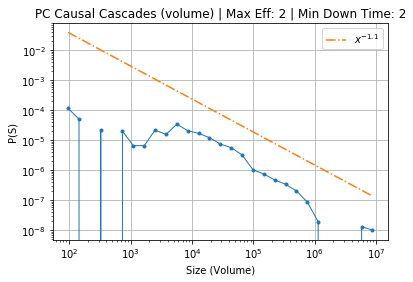

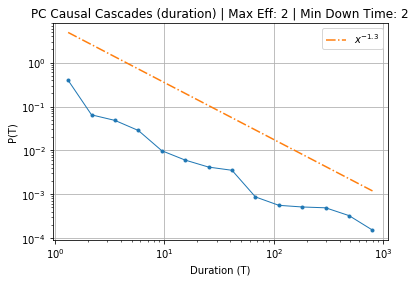

In [10]:
#pcsizes22, pcnrows22, pcduration22
hist, bins = np.histogram(pcnrows22, bins=np.logspace(np.log10(min(pcnrows22)),np.log10(max(pcnrows22)),30))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(pcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*10, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("PC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/7-9/plots/causalcascade_ntrans_pc79o501p1000s100t_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(pcsizes22, bins=np.logspace(np.log10(min(pcsizes22)),np.log10(max(pcsizes22)),30))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(pcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.1)*6, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("PC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/7-9/plots/causalcascade_volume_pc79o501p1000s100t_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(pcduration22, bins=np.logspace(np.log10(min(pcduration22)),np.log10(max(pcduration22)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(pcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("PC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/7-9/plots/causalcascade_duration_pc79o501p1000s100t_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

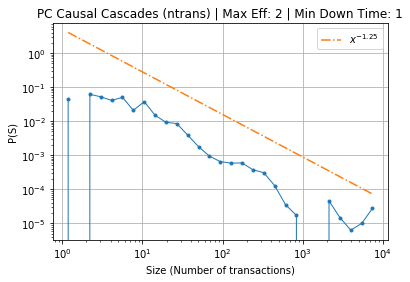

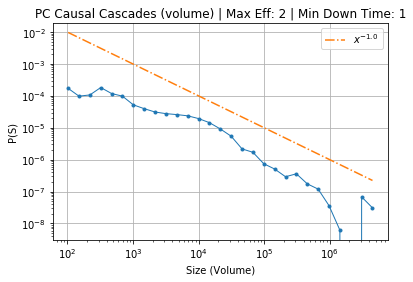

In [11]:
#pcsizes21, pcnrows21, pcduration21
hist, bins = np.histogram(pcnrows21, bins=np.logspace(np.log10(min(pcnrows21)),np.log10(max(pcnrows21)),30))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(pcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.25)*5, '-.', label= "$x^{-1.25}$")
plt.loglog()
plt.legend()
plt.title("PC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/7-9/plots/causalcascade_ntrans_pc79o501p1000s100t_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(pcsizes21, bins=np.logspace(np.log10(min(pcsizes21)),np.log10(max(pcsizes21)),30))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(pcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("PC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/7-9/plots/causalcascade_volume_pc79o501p1000s100t_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(pcduration21, bins=np.logspace(np.log10(min(pcduration21)),np.log10(max(pcduration21)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(pcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("PC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/7-9/plots/causalcascade_duration_pc79o501p1000s100t_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

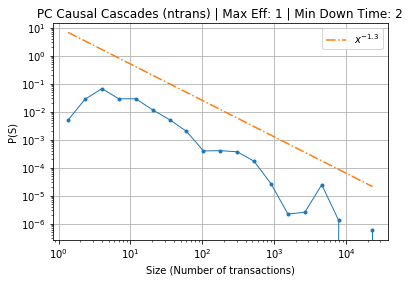

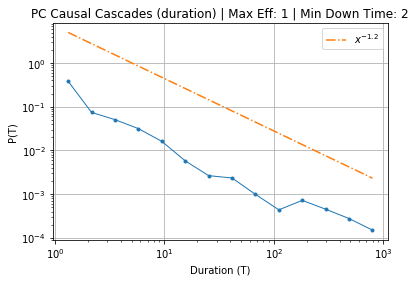

In [12]:
#pcsizes12, pcnrows12, pcduration12
hist, bins = np.histogram(pcnrows12, bins=np.logspace(np.log10(min(pcnrows12)),np.log10(max(pcnrows12)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(pcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*10, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("PC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/7-9/plots/causalcascade_ntrans_pc79o501p1000s100t_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(pcsizes12, bins=np.logspace(np.log10(min(pcsizes12)),np.log10(max(pcsizes12)),30))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(pcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("PC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/7-9/plots/causalcascade_volume_pc79o501p1000s100t_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(pcduration12, bins=np.logspace(np.log10(min(pcduration12)),np.log10(max(pcduration12)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(pcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("PC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/7-9/plots/causalcascade_duration_pc79o501p1000s100t_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

In [13]:
#pcsizes11, pcnrows11, pcduration11
hist, bins = np.histogram(pcnrows11, bins=np.logspace(np.log10(min(pcnrows11)),np.log10(max(pcnrows11)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(pcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3), '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("PC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/7-9/plots/causalcascade_ntrans_pc79o501p1000s100t_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(pcsizes11, bins=np.logspace(np.log10(min(pcsizes11)),np.log10(max(pcsizes11)),30))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(pcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("PC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/7-9/plots/causalcascade_volume_pc79o501p1000s100t_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(pcduration11, bins=np.logspace(np.log10(min(pcduration11)),np.log10(max(pcduration11)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(pcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("PC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/7-9/plots/causalcascade_duration_pc79o501p1000s100t_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [ ]:
with open('./results/7-9/cascades_', 'rb') as handle:
    causalCascades22 = pickle.load(handle)